# 기본 셋팅

## 필요한 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot을 로드

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='whitegrid')

## 데이터셋 로드

In [2]:
df = pd.read_csv("../data/diabetes.csv")
df.shape

(768, 9)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Feature engineering - new

## 수치형 변수를 범주형 변수로 만들기

In [4]:
# Pregnancies 범주화

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


## 범주형 변수를 수치형으로 만들기

In [5]:
# Age 범주화
# One-Hot Encoding: 범주형 데이터를 수치형으로. 해당 컬럼에 해당되는지 여부
# 수치데이터(나이) -> 범주화(나이가<30, 30<=나이<60, 60<나이) -> 범주화 된 해당 데이터를 다시 수치화(True/False)

df["Age_low"] = df["Age"] < 30
df["Age_middle"] = (df["Age"] >= 30) & (df["Age"] <= 60)
df["Age_high"] = df["Age"] > 60
df[["Age", "Age_low", "Age_middle", "Age_high"]].head()

,Age,Age_low,Age_middle,Age_high
0,50,False,True,False
1,31,False,True,False
2,32,False,True,False
3,21,True,False,False
4,33,False,True,False


<AxesSubplot:xlabel='Age_low', ylabel='count'>

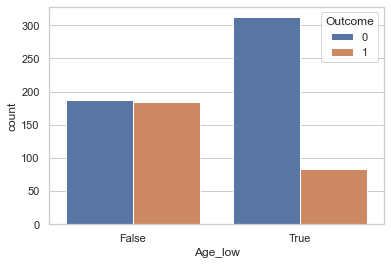

In [6]:
sns.countplot(data=df, x="Age_low", hue="Outcome")

- True = Age_low(25세 미만)인 사람들의 발병률(Outcome=1)이 훨씬 낮다

<AxesSubplot:xlabel='Age_middle', ylabel='count'>

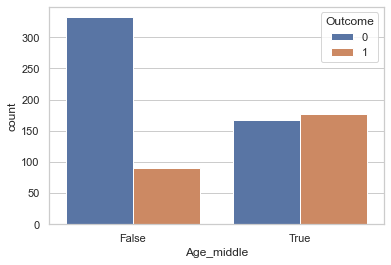

In [7]:
sns.countplot(data=df, x="Age_middle", hue="Outcome")

<AxesSubplot:xlabel='Age_high', ylabel='count'>

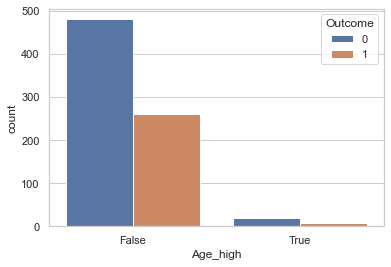

In [8]:
sns.countplot(data=df, x="Age_high", hue="Outcome")

## 결측치 다루기

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
Pregnancies_high            0
Age_low                     0
Age_middle                  0
Age_high                    0
dtype: int64

- 결측치가 없다고 나옴

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 하지만 실제로는 df.describe()를 해보면 
- Glucose, BloodPressure, SkinThickness, Insulin, BMI 같은 애들은 0이 들어갈 수 없는데 0으로 되어 있는 경우가 많음

In [11]:
# Insulin이 0인 값은 결측치 nan으로 전처리 해준다

df["Insulin_nan"] = df["Insulin"].replace(0, np.nan)
df[["Insulin", "Insulin_nan"]].head()

,Insulin,Insulin_nan
0,0,NaN
1,0,NaN
2,0,NaN
3,94,94.0
4,168,168.0


In [12]:
# Insulin의 결측치 갯수

df["Insulin_nan"].isnull().sum()

374

In [13]:
# Insulin의 결측치 비율

df["Insulin_nan"].isnull().mean()

0.4869791666666667

In [14]:
# Insulin의 결측치를 처리해준 것과 해주지 않은 데이터가 평균값이 어느정도 차이 나는지
# 당뇨병 발병 여부(Outcome) 값에 따라서 Insulin, Insulin_nan의 평균값을 보여준다 

df.groupby(["Outcome"])["Insulin", "Insulin_nan"].describe()

/var/folders/5n/40w2sqt964z7wvg0nvdc851w0000gn/T/ipykernel_64564/3543129882.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].describe()


Insulin                                                         \
          count        mean         std  min  25%   50%     75%    max   
Outcome                                                                  
0         500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0   
1         268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0   

        Insulin_nan                                                             
              count        mean         std   min    25%    50%     75%    max  
Outcome                                                                         
0             264.0  130.287879  102.482237  15.0   66.0  102.5  161.25  744.0  
1             130.0  206.846154  132.699898  14.0  127.5  169.5  239.25  846.0

In [15]:
# describe 중에서 보고싶은 것들만 나오게

df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])

/var/folders/5n/40w2sqt964z7wvg0nvdc851w0000gn/T/ipykernel_64564/3311136035.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby(["Outcome"])["Insulin", "Insulin_nan"].agg(["mean", "median"])


Insulin        Insulin_nan       
               mean median        mean median
Outcome                                      
0         68.792000   39.0  130.287879  102.5
1        100.335821    0.0  206.846154  169.5

### 결측치를 평균값으로 채우기

In [16]:
# 결측치 채우기
# nan 대신 평균값인 130, 206으로 채워준다

# df.loc[(df["Outcome"]==0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 130
# df.loc[(df["Outcome"]==1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 206

### 결측치를 중앙값으로 채우기

In [17]:
# 결측치 채우기
# nan 대신 중앙값인 102.5, 169.5로 채워준다

df.loc[(df["Outcome"]==0) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 102.5
df.loc[(df["Outcome"]==1) & (df["Insulin_nan"].isnull()), "Insulin_nan"] = 169.5

## 정규분포로 변환


- ML/DL 알고리즘은 한 쪽으로 치우친 데이터 보다, 정규분포를 이루는 데이터에 대해 더 좋은 성능을 낸다.

### 왜도, 첨도

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

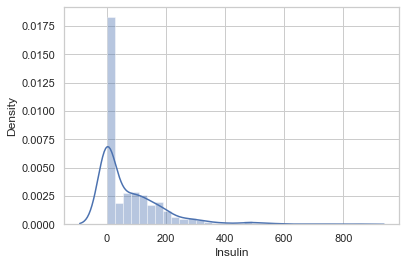

In [18]:
# Insulin 데이터 분포 보기

sns.distplot(df["Insulin"])

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

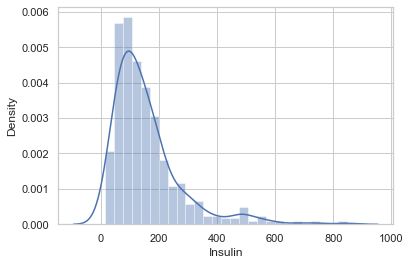

In [19]:
# 0 보다 큰 Insulin 값만 가지고 온다

sns.distplot(df.loc[df["Insulin"]>0, "Insulin"])

- 여전히 한 쪽으로 치우쳐져 있고(왜도), 굉장히 뾰족한 형태(첨도)
- 양쪽으로 꼬리가 길게 빠짐

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

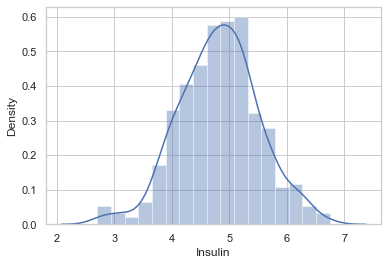

In [20]:
# log를 씌운다
# 이 때 1과 같은 작은 숫자를 더해주는데, 그 이유는 0 이하에서는 마이너스 값으로 수렴하기 때문에

sns.distplot(np.log(df.loc[df["Insulin"]>0, "Insulin"] + 1))

- 좀 더 정규분포 모양으로 바뀜
- 양쪽으로 길게 빠지던 꼬리가 짧아짐

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_nan', ylabel='Density'>

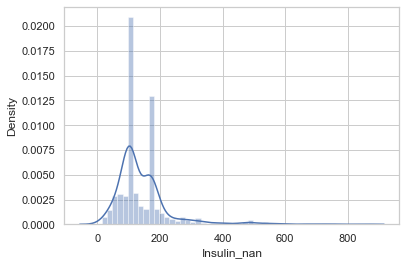

In [21]:
sns.distplot(df["Insulin_nan"])

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin_log', ylabel='Density'>

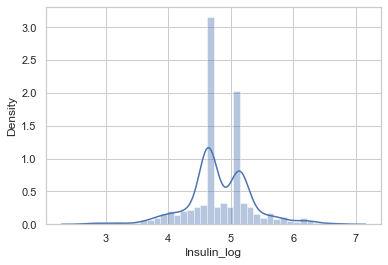

In [22]:
# 1 이하의 값에서 마이너스 무한대로 수렴하기 때문에 +1을 해준다

df["Insulin_log"] = np.log(df["Insulin_nan"] + 1)
sns.distplot(df["Insulin_log"])

## 상관분석을 통해 파생변수 만들기

- Glucose-Insulin의 상관계수가 높음 & 뚜렷하게 구분되는 지점이 보임
- Glucose가 100보다 낮고, Insulin이 중앙값보다 낮을 때, 당뇨병이 걸릴 확률이 현저히 떨어짐

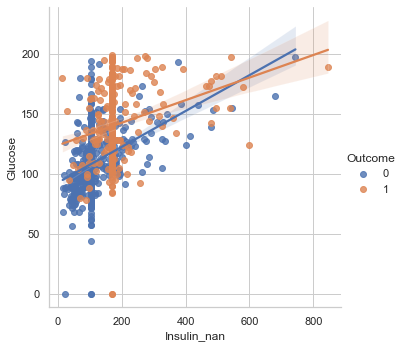

In [23]:
sns.lmplot(data=df, x="Insulin_nan", y="Glucose", hue="Outcome")

In [24]:
df["low_glu_insulin"] = (df["Glucose"] < 100) & (df["Insulin_nan"] <= 102.5)
df["low_glu_insulin"].head()

0    False
1     True
2    False
3     True
4    False
Name: low_glu_insulin, dtype: bool

In [25]:
# 범주형 값에 대한 cross table을 그려준다

pd.crosstab(df["Outcome"], df["low_glu_insulin"])

low_glu_insulin,False,True
Outcome,,
0,332,168
1,263,5


## 이상치(Outlier) 다루기

- https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin'>

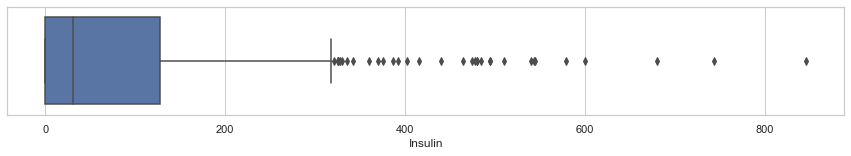

In [26]:
plt.figure(figsize=(15,2))
sns.boxplot(df["Insulin"])

/Users/angelayoon/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Insulin_nan'>

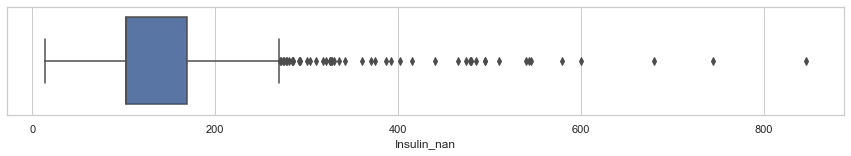

In [27]:
plt.figure(figsize=(15,2))
sns.boxplot(df["Insulin_nan"])

In [28]:
df["Insulin_nan"].describe()

count    768.000000
mean     141.753906
std       89.100847
min       14.000000
25%      102.500000
50%      102.500000
75%      169.500000
max      846.000000
Name: Insulin_nan, dtype: float64

- 25%: 상자의 시작 값
- 결측치를 전부 중앙값으로 채워줘서 25% == 50%로 나옴 (원래는 중앙값인 50%가 있어야 함)

### 이상치 구하기

- 사분위수 범위(IQR, Interquartile range, Q3-Q1)을 구한다.
- 이상치(Outlier): Q3보다 1.5IQR 이상 초과하는 값과 Q1 보다 1.5IQR 이상 미달하는 값

In [29]:
# 3사분위 수와 1사분위 수를 구한다.
# IQR 값을 구한다

Q3 = df["Insulin_nan"].quantile(0.75)
Q1 = df["Insulin_nan"].quantile(0.25)
IQR = Q3 - Q1
IQR

67.0

In [30]:
outlier = Q3 + (IQR * 1.5)

In [31]:
# Outlier 갯수 = 51

df[df["Insulin_nan"] > outlier].shape

(51, 16)

In [32]:
# 51개를 전부 제거하기엔 너무 많으니까, 600이상인 값 3개만 제거한다

df[df["Insulin_nan"] > 600].shape

(3, 16)

## Scaling

- ex) 주관식을 채점한다고 할 때, 채점자에 따라서 점수를 후하게 줄 수도, 박하게 줄 수도 있기 때문에 일정한 수치 범위로 scaling 해준다.

- DiabetesPedigreeFuncion의 경우 숫자가 작은 편 (0.0~2.5)
- Glucose의 경우 다른 feature들에 비해 숫자가 큰 편 (0~250)

(사실은 많은 차이가 나는 건 아님)

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[["Glucose", "DiabetesPedigreeFunction"]])
scale = scaler.transform(df[["Glucose", "DiabetesPedigreeFunction"]])
scale

array([[ 0.84832379,  0.46849198],
       [-1.12339636, -0.36506078],
       [ 1.94372388,  0.60439732],
       ...,
       [ 0.00330087, -0.68519336],
       [ 0.1597866 , -0.37110101],
       [-0.8730192 , -0.47378505]])

In [34]:
# df[["Glucose", "DiabetesPedigreeFunction"]] = scale
# df[["Glucose", "DiabetesPedigreeFunction"]].head()

array([[<AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>]],
      dtype=object)

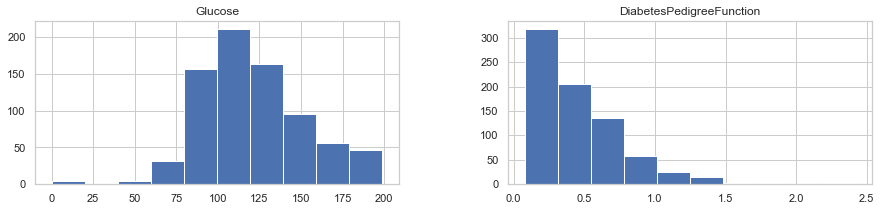

In [35]:
df[["Glucose", "DiabetesPedigreeFunction"]].hist(figsize=(15, 3))

- Glucose 와 DiabetesPedigreeFunction의 수치 범위가 비슷해짐
- Glucose: -4 ~ 2
- DiabetesPedigreeFucntion: -1 ~ 3

# 새로운 .csv 파일에 저장하기 - new

In [36]:
# csv파일로 저장하기
# 원래의 인덱스를 Unnamed:0이라는 컬럼에 따로 저장해줌. -> 이걸 없애려면 index=False

df.to_csv("../data/diabetes_feature.csv", index=False)

In [37]:
pd.read_csv("../data/diabetes_feature.csv").head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,0,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,0,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,0,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습을 위한 데이터셋 준비하기

## 학습, 예측 데이터셋 나누기

In [38]:
# 8:2의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count라는 변수에 담는다.
# training data와 test data로 나눌 때 614번째 인덱스를 기준으로 나눈다

split_count = int(df.shape[0]*0.8)
split_count

614

In [39]:
# train, test로 슬라이싱을 통해 데이터를 나누고 복사본을 만든다.
# index 0~613 = train data set

train = df[:split_count].copy()
train.shape

(614, 16)

In [40]:
# train 데이터에서 500 이상인 Outlier 제거

train = train[train["Insulin_nan"] < 600]
train.shape

(610, 16)

In [41]:
# index 614~767 = test data set

test = df[split_count:].copy()
test.shape

(154, 16)

## 학습, 예측에 사용할 컬럼 - new

In [42]:
# feature_names라는 변수에 학습과 예측에 사용할 컬럼명을 리스트로 가져온다.
# 가장 마지막 컬럼인 'Outcome'은 정답값으로 사용하기 위해 뺀다.

feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove("Outcome")
feature_names.remove("Age_low")
feature_names.remove("Age_middle")
feature_names.remove("Age_high")
feature_names.remove("Insulin")
feature_names.remove("Insulin_log")
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high',
 'Insulin_nan',
 'low_glu_insulin']

## 정답값이자 예측해야 될 값 - new

In [43]:
# label_name이라는 변수에 예측할 컬럼인 Outcome을 담는다. 
# 하나만 사용할 것이기 때문에 리스트가 아닌 String 형태로 가져온다

label_name = "Outcome"
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

In [44]:
# 학습세트 만들기 예) 시험의 기출문제
# 대문자 X는 행렬 형태

X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(610, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
0,148,72,35,33.6,0.627,50,False,169.5,False
1,85,66,29,26.6,0.351,31,False,102.5,True
2,183,64,0,23.3,0.672,32,True,169.5,False
3,89,66,23,28.1,0.167,21,False,94.0,True
4,137,40,35,43.1,2.288,33,False,168.0,False


In [45]:
# 정답값을 만들어 준다. 예) 기출문제의 정답
# 소문자 y는 벡터 형태

y_train = train[label_name]
print(y_train.shape)
y_train.head()

(610,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [46]:
# 예측에 사용할 데이터세트를 만든다. 예) 실전 시험 문제

X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 9)


,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high,Insulin_nan,low_glu_insulin
614,138,74,26,36.1,0.557,50,True,144.0,False
615,106,72,0,25.8,0.207,27,False,102.5,False
616,117,96,0,28.7,0.157,30,False,102.5,False
617,68,62,13,20.1,0.257,23,False,15.0,True
618,112,82,24,28.2,1.282,50,True,169.5,False


In [47]:
# 예측의 정답값 예) 실전 시험 문제의 정답

y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

# 머신러닝 알고리즘 가져오기

In [48]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

## 학습(훈련)

- 시험을 볼 때 기출문제(X_train)과 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [49]:
# Insulin의 결측치를 nan으로 처리해준 Insulin_nan으로 대체하면, 에러가 남
# nan 값들을 처리해줘야 함

model.fit(X_train, y_train)

DecisionTreeClassifier()

## 예측
- 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [50]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 0, 0, 1])

## 트리 알고리즘 분석하기

- DecisionTree를 시각화 합니다.

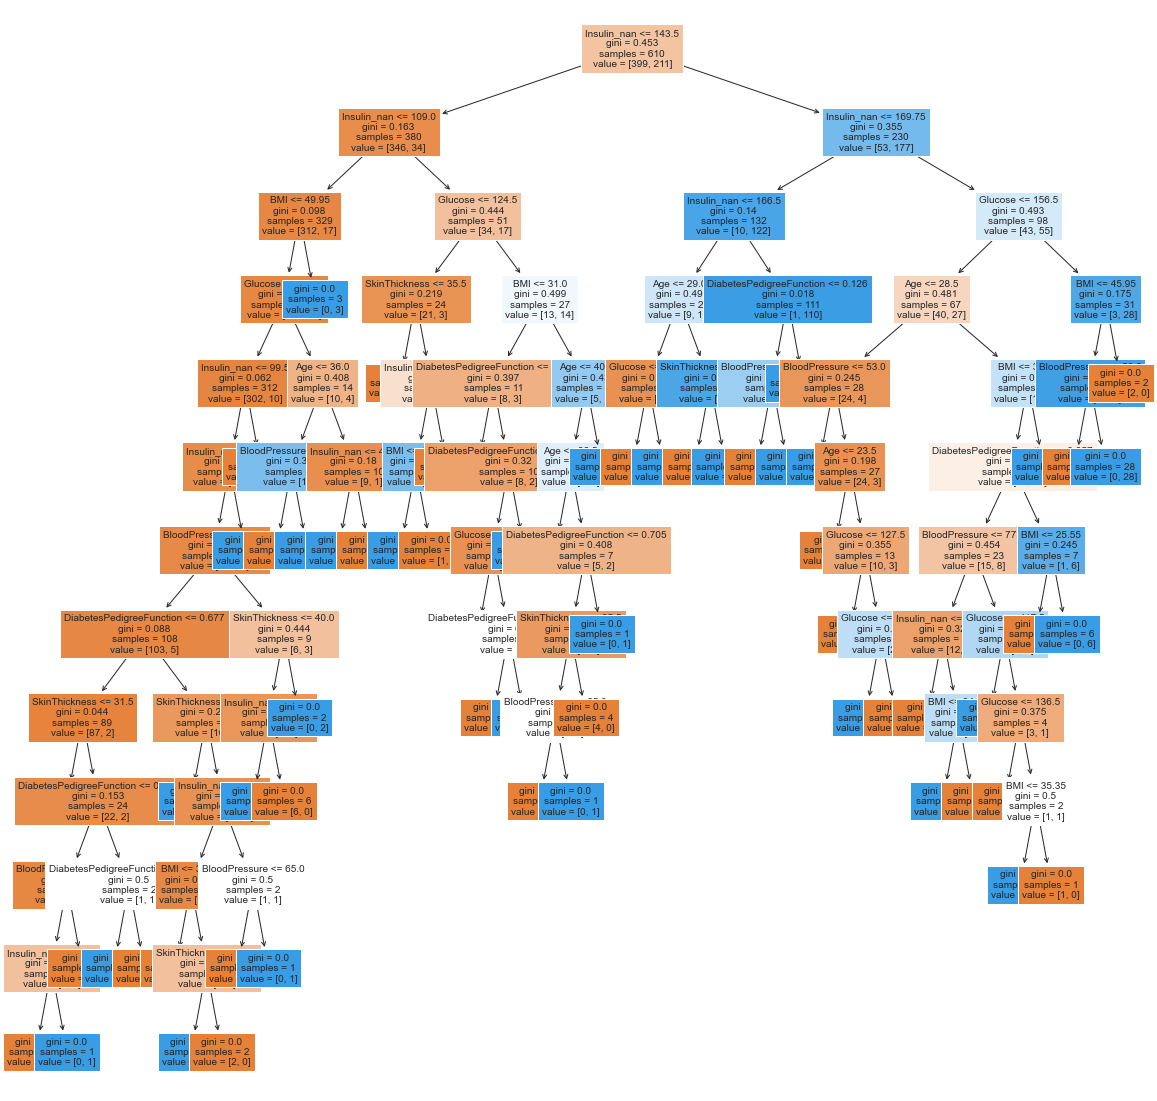

In [51]:
from sklearn.tree import plot_tree
from sklearn._config import set_config

set_config(print_changed_only=False)

plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names, filled=True, fontsize=10)

- 데이터를 나누기 가장 좋은 조건이라서 가장 위에 있음

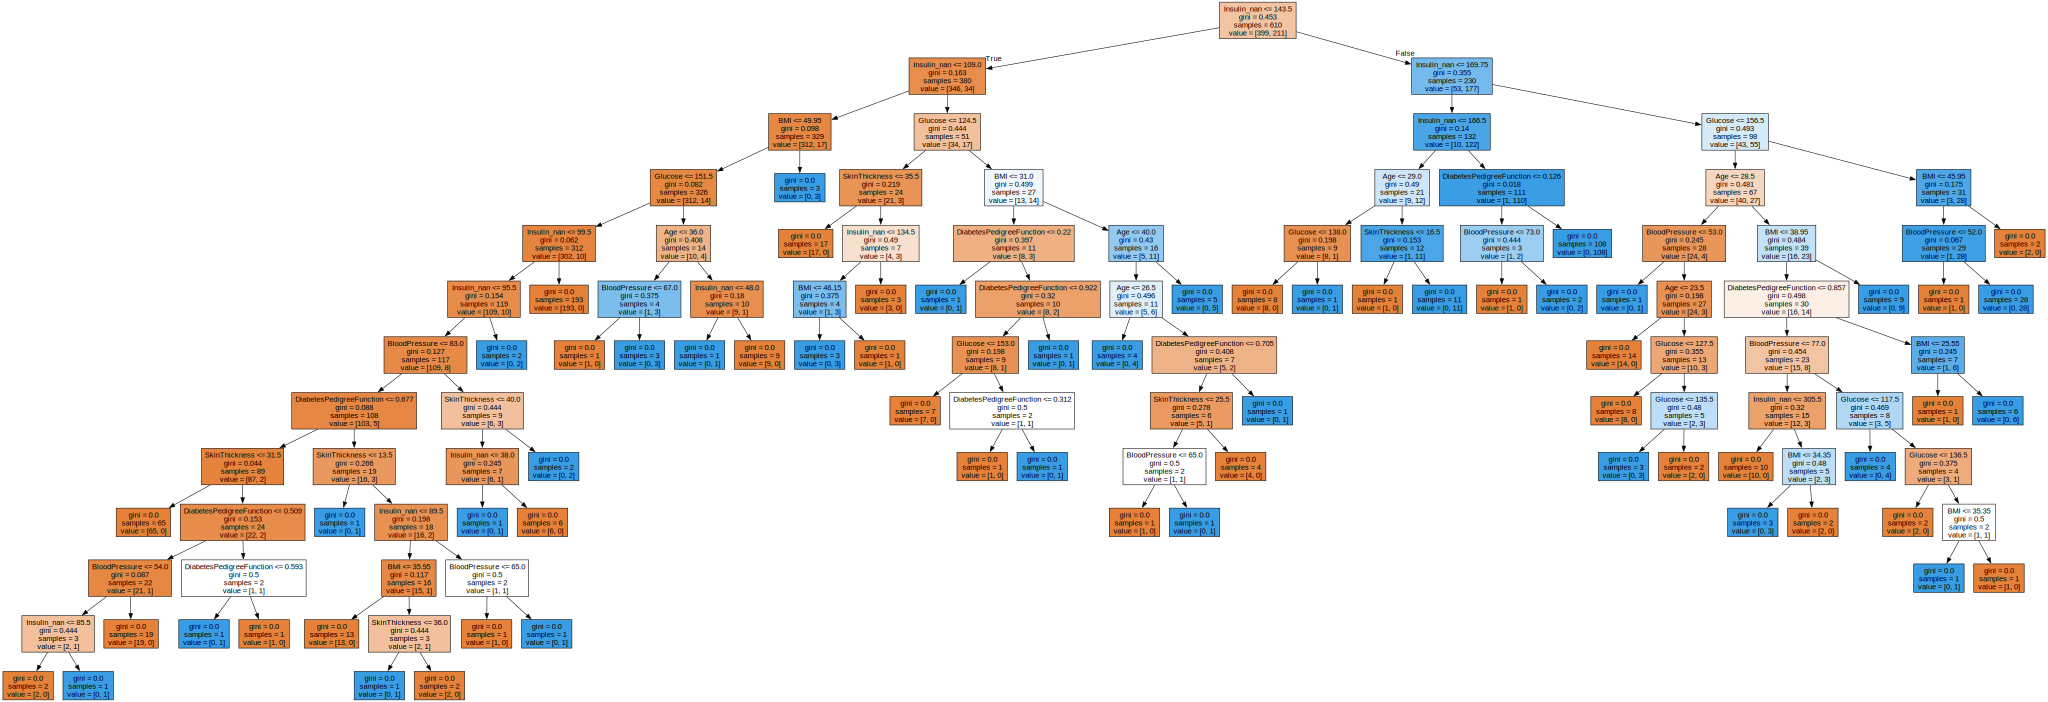

In [52]:
# graphviz를 통해 시각화 합니다.

import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names=feature_names, filled=True)
graphviz.Source(dot_tree)

In [53]:
# feature의 중요도를 추출하기

model.feature_importances_

array([0.09487231, 0.04389988, 0.03507233, 0.08068411, 0.03818837,
       0.07366808, 0.        , 0.63361492, 0.        ])

<AxesSubplot:>

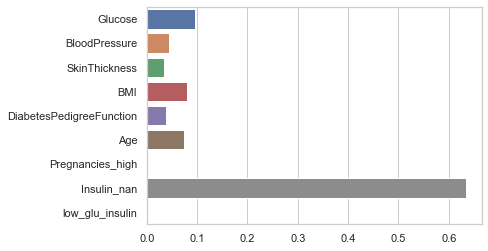

In [54]:
# feature의 중요도 시각화 하기

sns.barplot(x=model.feature_importances_, y=feature_names)

## Accuracy 측정하기 - new

[Pregnancies를 범주화 했을 때]
- Overfitting 되기 쉬운 연속된 수치형 변수인 Pregnancies를 범주형으로 바꿔줌(Pregnancies_high)
- 원래는 feature의 중요도가 높았지만 범주화 하면서 중요도가 낮아짐
- Accuracy 증가

[Age를 범주화 했을 때]
- Accuracy 감소
- 확연히 구분되지 않는 feature를 범주화 하면 오히려 정확도가 떨어질 수 있음 -> 별로 큰 도움인 되지 않음

[Insulin 결측치를 평균값으로 대체 했을 때]
- Accuracy 증가

In [55]:
# (실제값-예측값) = 0이면 같게 예측한 것.
# 여기에서 절대값을 씌운 값이 1인 값이 다르게 예측한 값이 된다.
# 44 => 39(Pregnancies) => 49(Age 25) => 55(Age 30) 
# => 23(Age는 원래대로, Insulin 평균값으로 결측치 처리) => 16(Insulin 중앙값으로 결측치 처리)
# => 15(인슐린&글루코스 상관계수로 파생변수를 생성)
# => 15(인슐린 수치가 600 이상인 outlier 제거)

diff_count = abs(y_test - y_predict).sum()
diff_count

19

In [56]:
# 100점 만점 중 몇 점을 맞았는지

(len(y_test) - diff_count) / len(y_test) * 100

87.66233766233766

In [57]:
# 위에서처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용할 수도 있음

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict) * 100

87.66233766233766

In [58]:
# model의 score로도 점수를 계산할 수 있음.

model.score(X_test, y_test) * 100

87.66233766233766